# Evaluation Project - 7
Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Obs: 8 attribute of Object datatype,4 attribute of float datatype and one attribute of integer data type.

In [6]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Obs: clearly data has missing values

# checking nulls

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

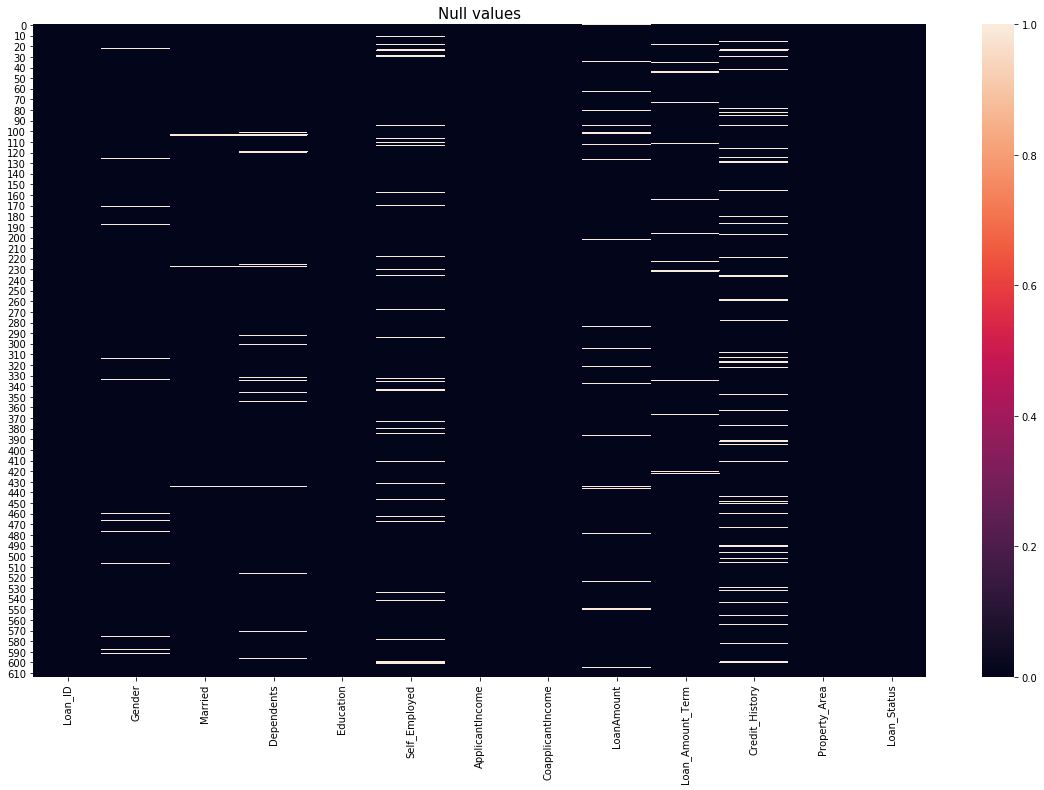

In [9]:
# ploting heatmap for double checking null values

plt.figure(figsize=(20,12))
plt.title("Null values",fontsize=15)
sns.heatmap(df.isnull());

#### Obs: clearly data has null values. needs to be filled.

In [10]:
# Dropping unnecessary columns. Loan Id has no significance to predict our Loan Status.
df = df.drop(['Loan_ID'],axis=1)

In [11]:
#Dividing columns into numeric and categorical
#for Numeric columns
num_df = df.select_dtypes(exclude='object')

#for categorical columns
obj_df = df.select_dtypes(include='object')

In [12]:
# value counts of all the object attributes
for col in obj_df:
    print('\n')
    print('-----------',col,'------------')
    print(obj_df[col].value_counts())



----------- Gender ------------
Male      489
Female    112
Name: Gender, dtype: int64


----------- Married ------------
Yes    398
No     213
Name: Married, dtype: int64


----------- Dependents ------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


----------- Education ------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


----------- Self_Employed ------------
No     500
Yes     82
Name: Self_Employed, dtype: int64


----------- Property_Area ------------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


----------- Loan_Status ------------
Y    422
N    192
Name: Loan_Status, dtype: int64


In [13]:
# statistical summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


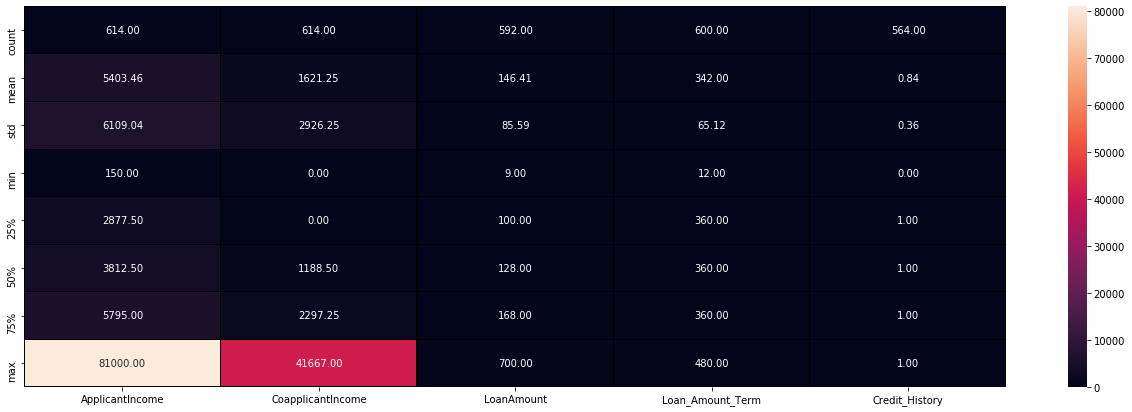

In [14]:
#Heatmap using df.describe

import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(), annot=True, linewidths=0.1, linecolor='black',fmt=".2f")

#### Obs: 

1-We can see that our data is right skewed & left skewed both.

2- Applicant Income,co applicant Income are Right skewed because Mean Is greater than Median values.

3- loan Amount & Loan_amount term are left skewed because Median is greater than Mean values.

4- we can see there are outliers are present in our dataset because difference between the value of 3rd quantile and maximun values is more.

In [15]:
# checking value counts for credit history
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [16]:
# filling null values with the MODE values in categorical column
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [17]:
## filling null values with Median values in float dataypes.
## We have put 1 in credit History attribute because it appears maximum times in our dataset.
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].replace(np.nan,1)

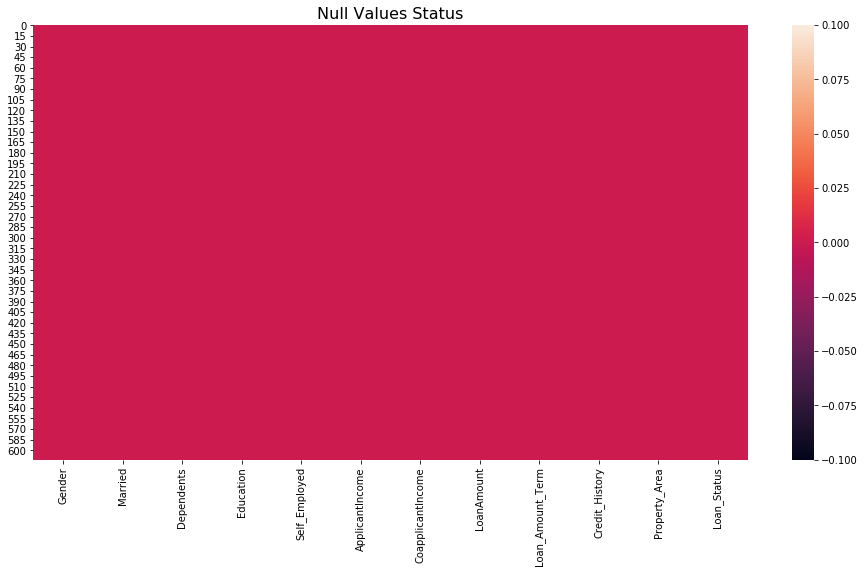

In [18]:
# ploting heatmapfor showing null values status
plt.figure(figsize=(16,8))
plt.title('Null Values Status',fontsize=16)
sns.heatmap(df.isnull());

#### Obs: Null values have been filled.

# Correlation

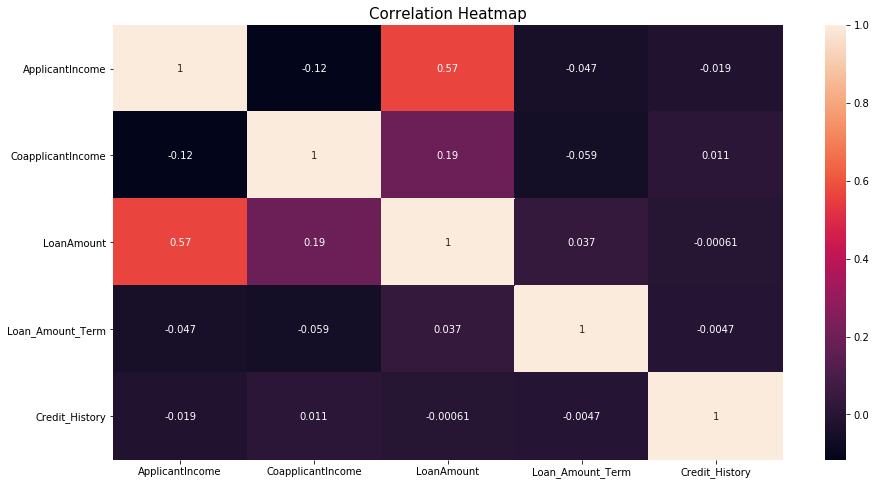

In [19]:
plt.figure(figsize=(15,8))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True);

#### Obs:

1- Our Loan amount is highly correlated with Applicant Income which is .57.

2- Neither the strong positive nor the strong negative correlation present in any variable.

# Data Visualization

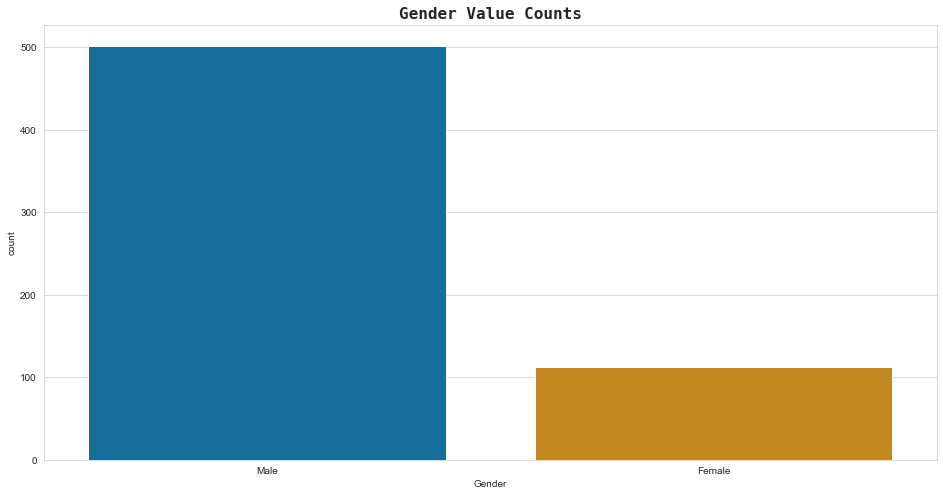

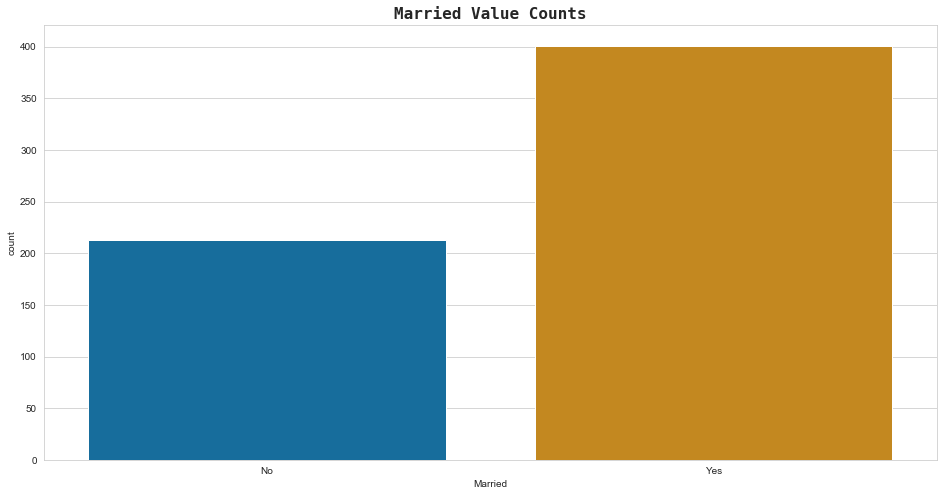

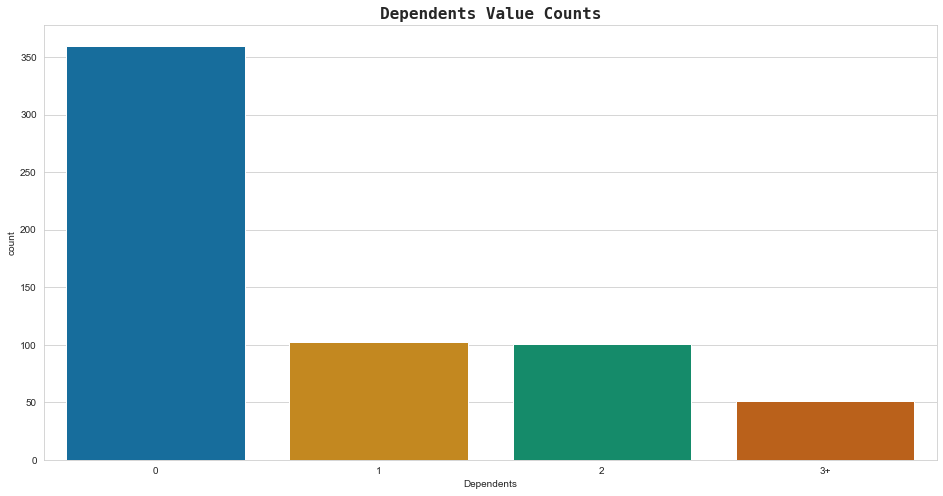

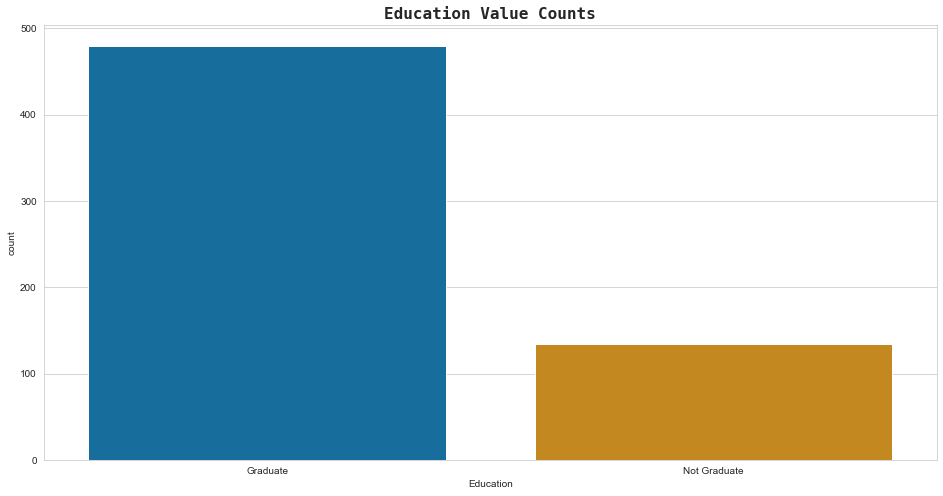

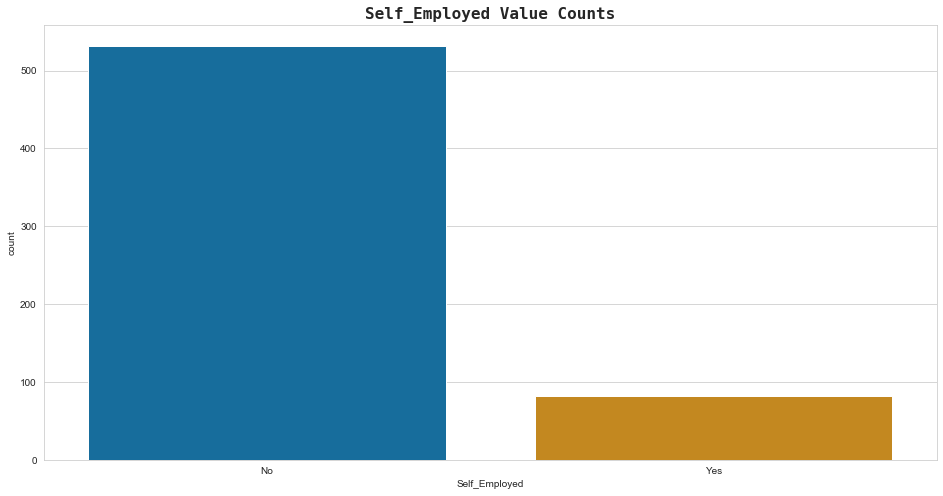

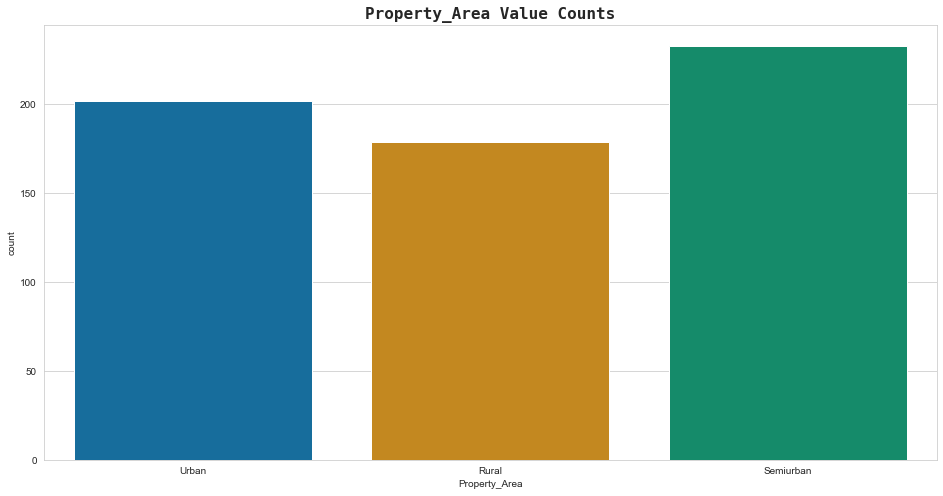

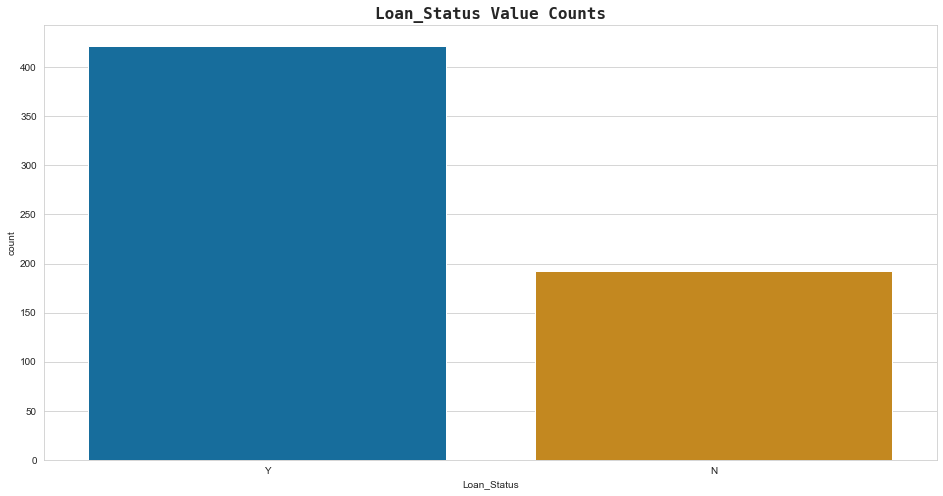

In [20]:
for col in obj_df:
    sns.set_style('whitegrid')
    plt.figure(figsize=(16,8))
    plt.title(col+' Value Counts',fontsize=16,fontname='Monospace',fontweight='bold')
    x=sns.countplot(df[col],palette='colorblind',data=df)
    plt.show();

#### Obs:

Around 82% applicants are male in the dataset.

Approx. 47% applicants are married.

Majority applicants have zero dependents in our dataset.

The not graduated applicants are below the half of the count of the applicants who are graduated.

Around 16% applicants are self employed.

most of loan applicant belong from semiurban area. 7- Our Target attribute is almost balance as it has 55:45 ratio.

# Bi-variate Analysis

In [21]:
## Creating a function
def relation_target(df,col):
    plt.figure(figsize=(15,6))
    plt.title(col+' Vs Loan_Status ',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
    sns.countplot(x =col, hue ="Loan_Status",palette='colorblind' ,data = df)
    plt.plot()

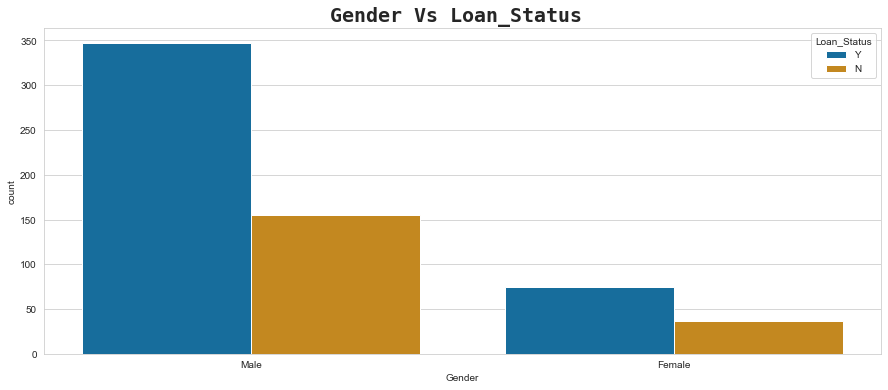

In [22]:
relation_target(df,'Gender')

Mostly Males sanctioned for loan as compaired to Females.

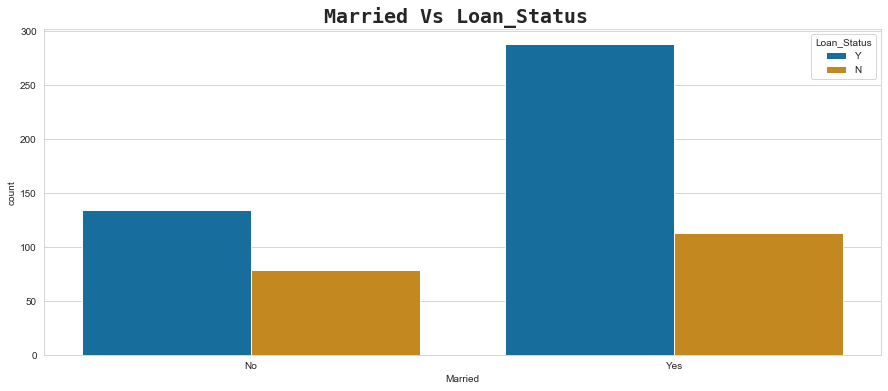

In [23]:
relation_target(df,'Married')

Around 300 applicants are married whose loans are approved as compared to the applicants who are not married but their loans were approved

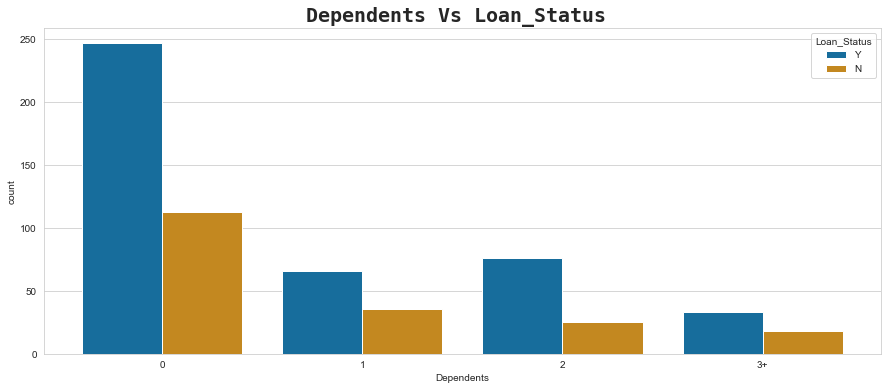

In [24]:
relation_target(df,'Dependents')

Majority of the applicants whose loans are approved have no or 0 dependency & the minimun loan approved to those who has higher number of dependents.

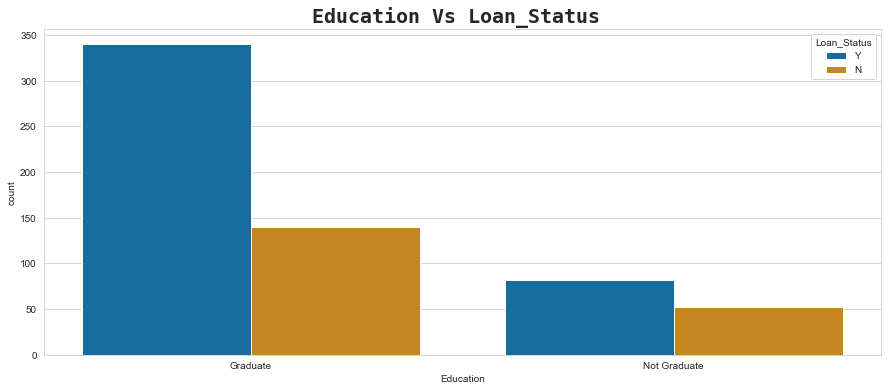

In [25]:
relation_target(df,'Education')

The count of graduates whose loans are approved is high as compared to the non graduates having approved loans.

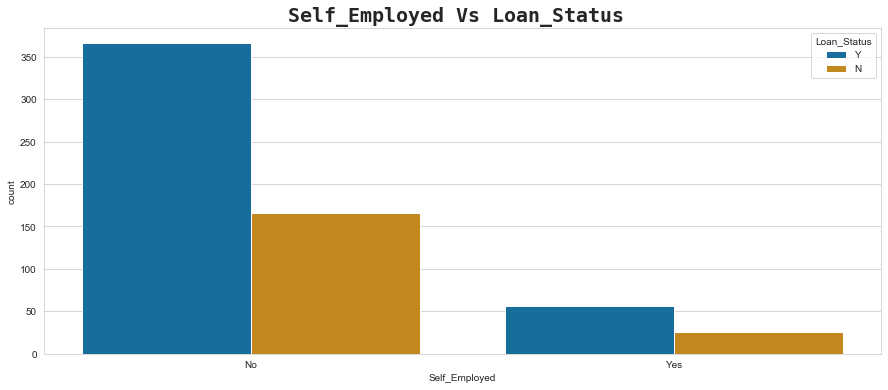

In [26]:
relation_target(df,'Self_Employed')

The percentage of self-employed applicants having approved loans is around 15% of the non self employed applicants having approved loans.

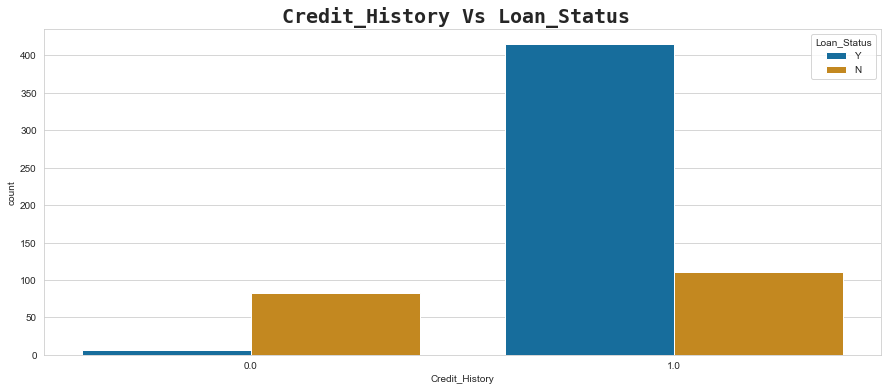

In [27]:
relation_target(df,'Credit_History')

People who has credit history 1 has the highest loan approval as compared to 0 credit history. People Who has zero credit score mostly they are denied to grant loan.

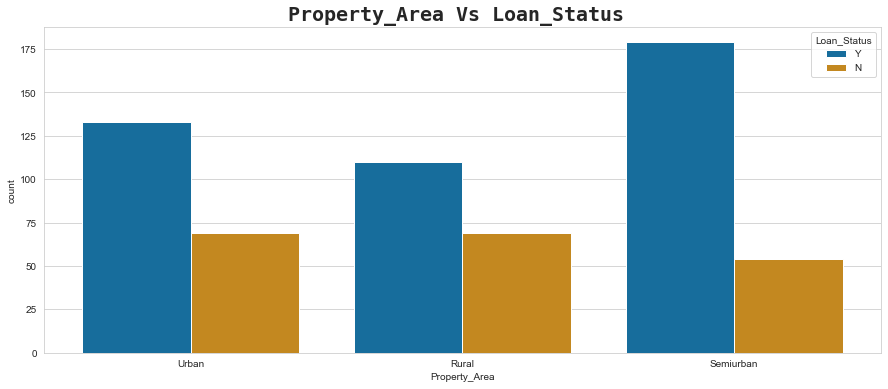

In [28]:
relation_target(df,'Property_Area')

The max. no. of applicants whose loans are approved belongs to or having property in semi-urban area.

In [29]:
num_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [30]:
def barplot_target(df,col):
    plt.figure(figsize=(15,6))
    plt.title(col+' Vs Loan_Status ',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
    sns.barplot(y =col, x="Loan_Status",palette='colorblind' ,data = df)
    plt.plot()

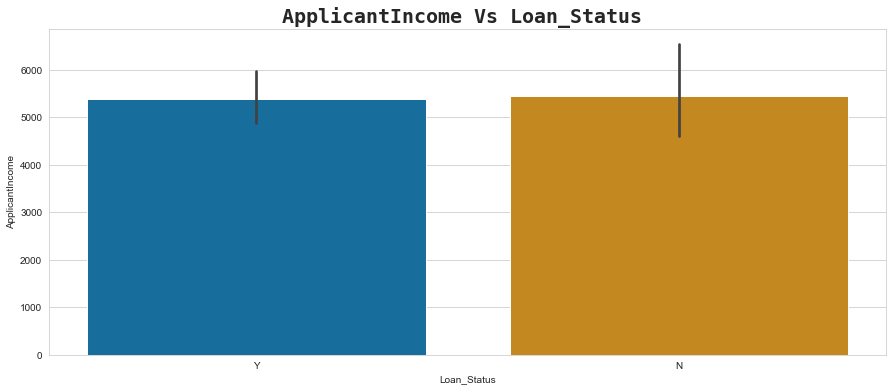

In [31]:
barplot_target(df,'ApplicantIncome')

There is almost similar income of people who sanction loans/ denied. Applicant income has no significance to decide whether loan will approve or not.

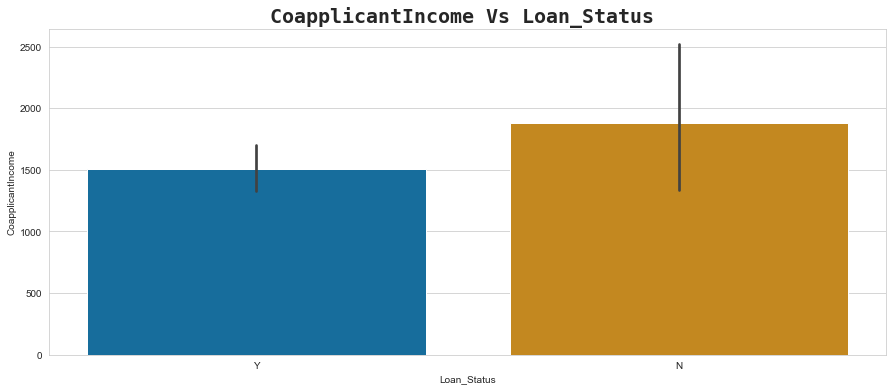

In [32]:
barplot_target(df,'CoapplicantIncome')

We can observe that, if co applicant income is higher than 1500, there are chances of denial to loan.

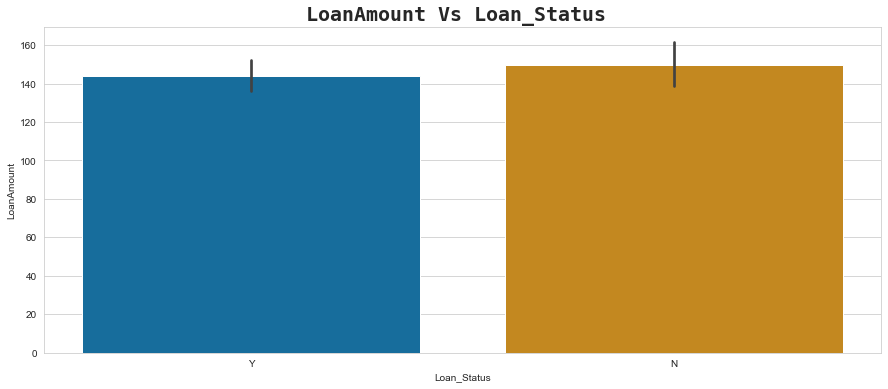

In [33]:
barplot_target(df,'LoanAmount')

There is almost similar trend regarding Loan Amount. There is no relation between Loan Amount and Loan Status.

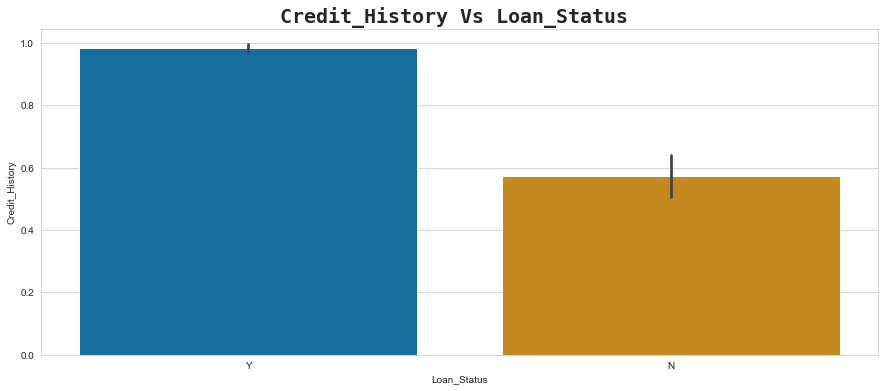

In [34]:
barplot_target(df,'Credit_History')

we can see that a person who has credit history one has highest loan approval rate.

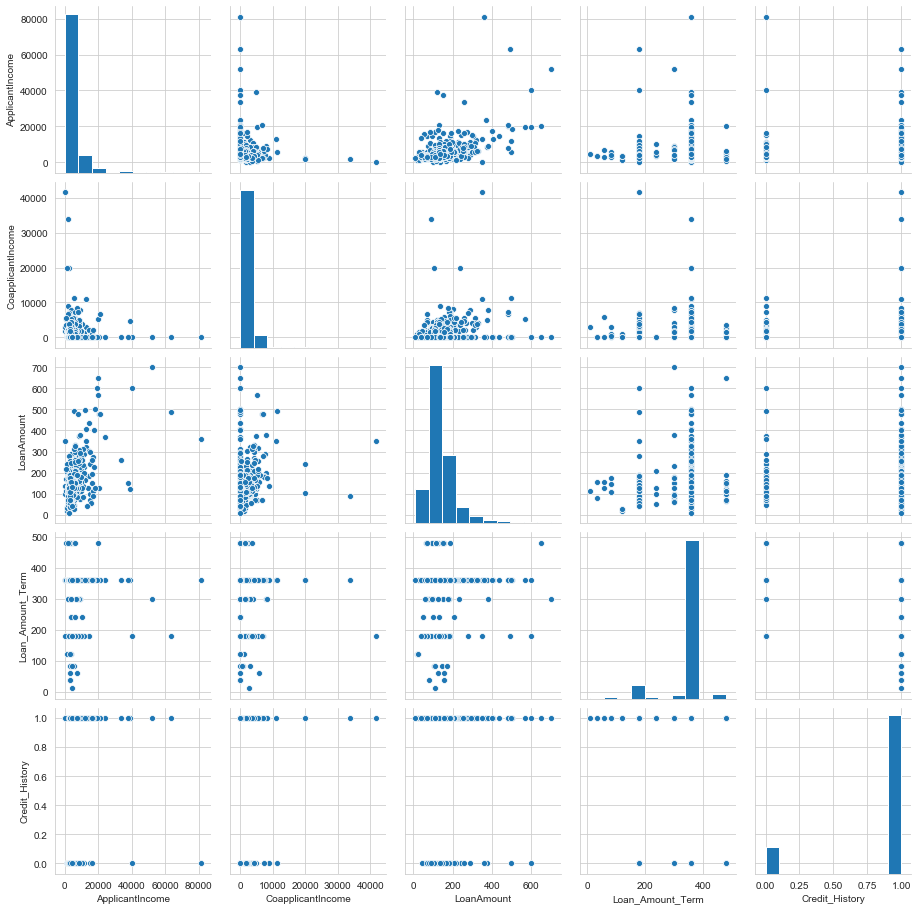

In [35]:
sns.pairplot(df);

# Data Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011C5A78B1C8>,
      dtype=object)

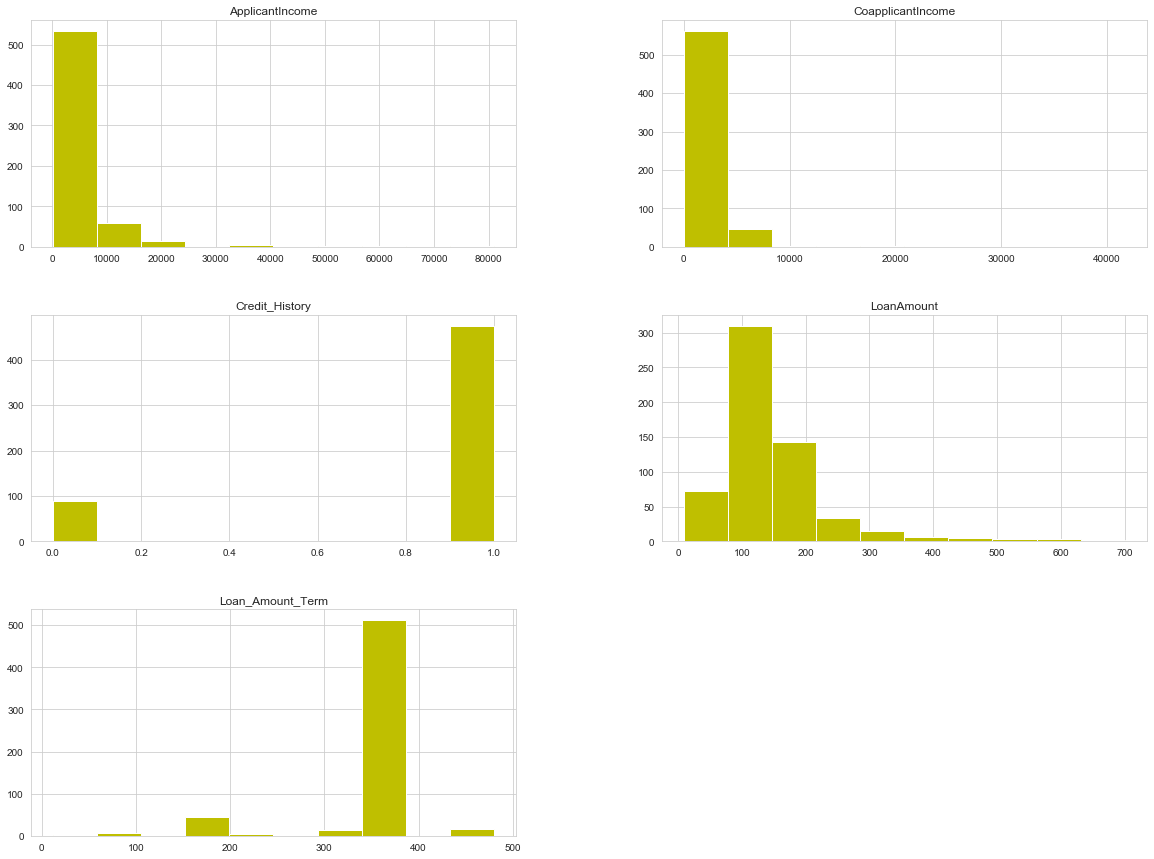

In [36]:
num_df.hist(color = 'y' , figsize=(20,15))

#### Obs:

1-We could see that applicants income, Co-applicants income, Laon Amount are right skewed.

2- Laon Amount Term has majority values of 360 months.

# Outliers 

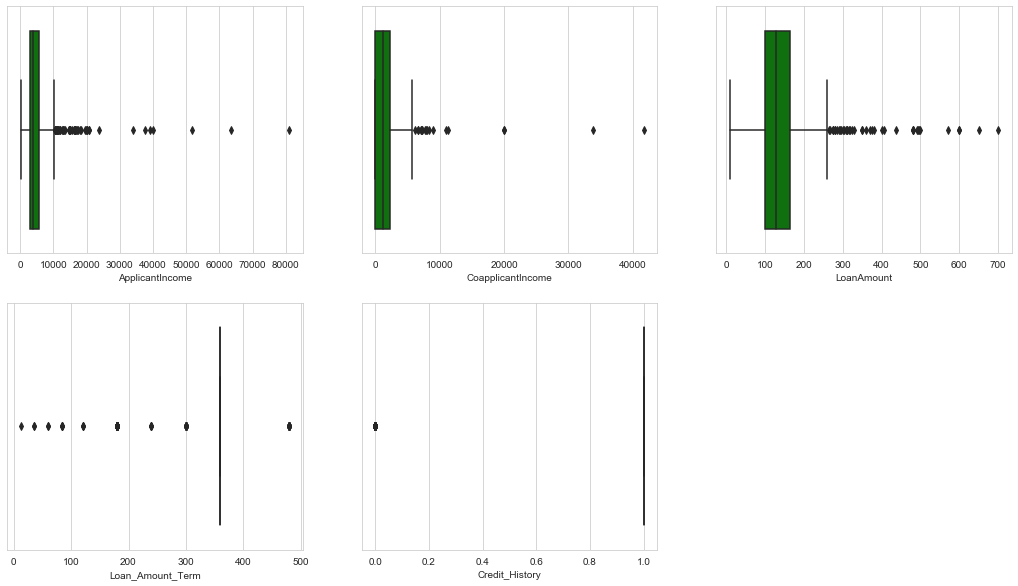

In [37]:
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.boxplot(df[col],color='green')
        plt.xlabel(col)
        plot=plot+1
plt.show();

### Obs: Outliers are present in Appilcants Income, Coapplicants Income and Loan Amounts.

In [38]:
## when data is normally distributed.
def fixing_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    non_outlier=np.where((df[col]<lower_limit )|(df[col]>upper_limit),df[col].median(),df[col])
    df[col]=non_outlier
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])

In [39]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

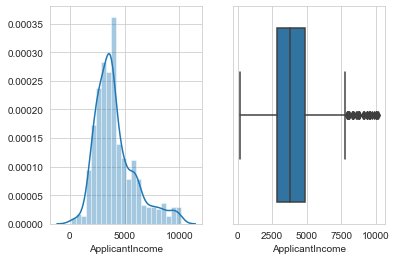

In [40]:
fixing_outlier(df,'ApplicantIncome')

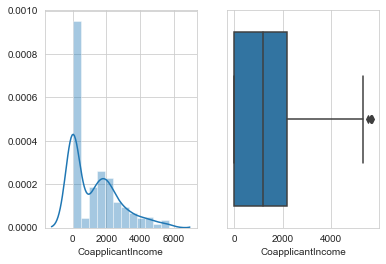

In [41]:
fixing_outlier(df,'CoapplicantIncome')

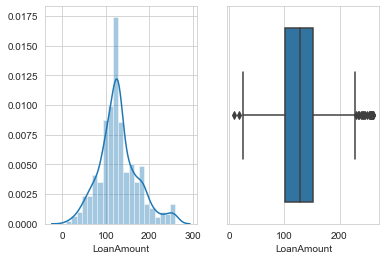

In [42]:
fixing_outlier(df,'LoanAmount')

# Skewness

In [43]:
df_1=df.copy()
df_1.skew()

ApplicantIncome      1.149106
CoapplicantIncome    0.936471
LoanAmount           0.498333
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [44]:
df_1['ApplicantIncome']=np.sqrt(df_1['ApplicantIncome'])
df_1['CoapplicantIncome']=np.sqrt(df_1['CoapplicantIncome'])
df_1.skew()

ApplicantIncome      0.438048
CoapplicantIncome    0.152060
LoanAmount           0.498333
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

Skewness is handled.

# Encoding

In [45]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [46]:
for i in df.columns:
    if df_1[i].dtypes == "object":
        df_1[i] = enc.fit_transform(df_1[i].values.reshape(-1,1))

In [47]:
df_1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,76.478755,0.000000,128.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,67.697858,38.832976,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,54.772256,0.000000,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,50.823223,48.559242,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,77.459667,0.000000,141.0,360.0,1.0,2.0,1.0


# Splitting Data into Features and Target Variable

In [48]:
x=df_1.drop(['Loan_Status'],axis=1)
y=df_1[['Loan_Status']]

In [49]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,76.478755,0.000000,128.0,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,67.697858,38.832976,128.0,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,54.772256,0.000000,66.0,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,50.823223,48.559242,120.0,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,77.459667,0.000000,141.0,360.0,1.0,2.0


In [50]:
y.head()

,Loan_Status
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


# Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,1.005715,-1.043770,-0.010078,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.374031,0.521418,-0.010078,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.555816,-1.043770,-1.395146,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.839903,0.913442,-0.188797,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,1.076280,-1.043770,0.280339,0.273231,0.411733,1.223298


# Feature importance

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [53]:
print(extra.feature_importances_)

[0.0245491  0.02216344 0.06381432 0.02351648 0.02451823 0.18682124
 0.09760407 0.17952826 0.05014595 0.2793079  0.048031  ]


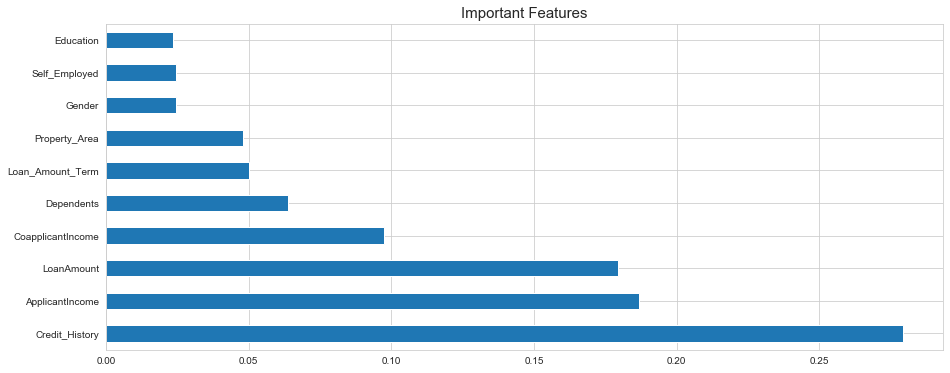

In [54]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show();

# Model Building

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.over_sampling import SMOTE

In [56]:
def model_run(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
        #x_train,y_train=SMOTE().fit_resample(x_train,y_train) ##over sampling of our Data
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

# Logistic Regression

max accuracy score corresponding to 76 is 86.1788617886179


cross validation score 80.78235372517659


Standard Deviation 2.6964969382167303


F1 score 90.3225806451613


Training accuracy 79.83706720977597


Test Accuracy 85.36585365853658


Confusion Matrix [[21 17]
 [ 1 84]]


Classification Report               precision    recall  f1-score   support

         0.0       0.95      0.55      0.70        38
         1.0       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



Roc_auc Score 0.7704334365325077





76

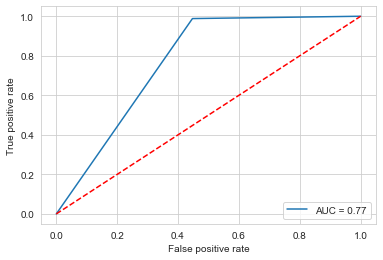

In [57]:
lg=LogisticRegression()
model_run(lg,x,y)

# Decision Tree

max accuracy score corresponding to 73 is 76.42276422764228


cross validation score 69.8667199786752


Standard Deviation 2.8012924116064166


F1 score 80.00000000000001


Training accuracy 100.0


Test Accuracy 72.35772357723577


Confusion Matrix [[21 17]
 [17 68]]


Classification Report               precision    recall  f1-score   support

         0.0       0.55      0.55      0.55        38
         1.0       0.80      0.80      0.80        85

    accuracy                           0.72       123
   macro avg       0.68      0.68      0.68       123
weighted avg       0.72      0.72      0.72       123



Roc_auc Score 0.6763157894736842





73

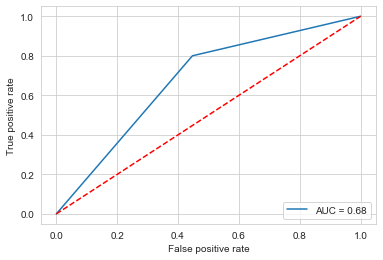

In [58]:
dt = DecisionTreeClassifier()
model_run(dt,x,y)

# KNN

max accuracy score corresponding to 77 is 85.36585365853658


cross validation score 77.5223244035719


Standard Deviation 1.9884914661415496


F1 score 86.95652173913044


Training accuracy 80.04073319755601


Test Accuracy 80.48780487804879


Confusion Matrix [[19 19]
 [ 5 80]]


Classification Report               precision    recall  f1-score   support

         0.0       0.79      0.50      0.61        38
         1.0       0.81      0.94      0.87        85

    accuracy                           0.80       123
   macro avg       0.80      0.72      0.74       123
weighted avg       0.80      0.80      0.79       123



Roc_auc Score 0.7205882352941176





77

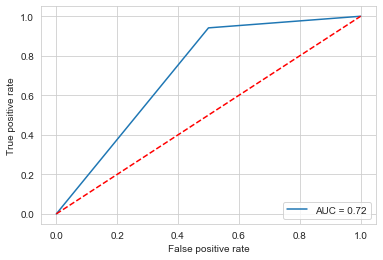

In [59]:
knn = KNeighborsClassifier()
model_run(knn,x,y)

# Naive Bayes

max accuracy score corresponding to 76 is 86.1788617886179


cross validation score 80.45848327335733


Standard Deviation 2.9382051515228578


F1 score 90.3225806451613


Training accuracy 79.83706720977597


Test Accuracy 85.36585365853658


Confusion Matrix [[21 17]
 [ 1 84]]


Classification Report               precision    recall  f1-score   support

         0.0       0.95      0.55      0.70        38
         1.0       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



Roc_auc Score 0.7704334365325077





76

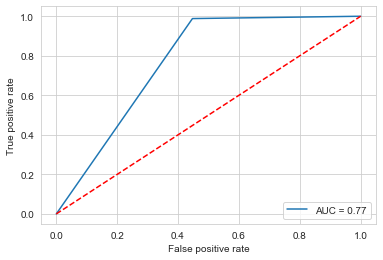

In [60]:
gnb = GaussianNB()
model_run(gnb,x,y)

# Random Forest

max accuracy score corresponding to 89 is 84.5528455284553


cross validation score 79.1536718645875


Standard Deviation 2.662446488121826


F1 score 87.292817679558


Training accuracy 100.0


Test Accuracy 81.30081300813008


Confusion Matrix [[21 17]
 [ 6 79]]


Classification Report               precision    recall  f1-score   support

         0.0       0.78      0.55      0.65        38
         1.0       0.82      0.93      0.87        85

    accuracy                           0.81       123
   macro avg       0.80      0.74      0.76       123
weighted avg       0.81      0.81      0.80       123



Roc_auc Score 0.7410216718266254





89

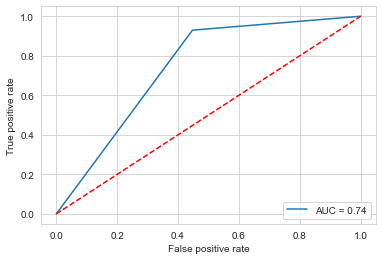

In [61]:
rf = RandomForestClassifier()
model_run(rf,x,y)

# AdaBoost

max accuracy score corresponding to 49 is 84.5528455284553


cross validation score 77.68892443022791


Standard Deviation 1.06870300662379


F1 score 89.50276243093921


Training accuracy 82.89205702647658


Test Accuracy 84.5528455284553


Confusion Matrix [[23 15]
 [ 4 81]]


Classification Report               precision    recall  f1-score   support

         0.0       0.85      0.61      0.71        38
         1.0       0.84      0.95      0.90        85

    accuracy                           0.85       123
   macro avg       0.85      0.78      0.80       123
weighted avg       0.85      0.85      0.84       123



Roc_auc Score 0.7791021671826625





49

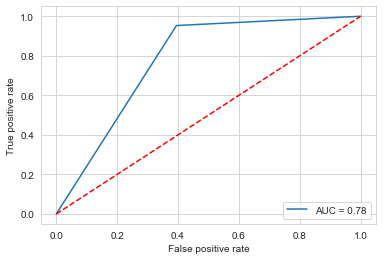

In [62]:
adb = AdaBoostClassifier()
model_run(adb,x,y)

# Gradient Boost

max accuracy score corresponding to 49 is 82.92682926829268


cross validation score 77.5276556044249


Standard Deviation 2.246258317586401


F1 score 86.66666666666667


Training accuracy 87.57637474541752


Test Accuracy 80.48780487804879


Confusion Matrix [[21 17]
 [ 7 78]]


Classification Report               precision    recall  f1-score   support

         0.0       0.75      0.55      0.64        38
         1.0       0.82      0.92      0.87        85

    accuracy                           0.80       123
   macro avg       0.79      0.74      0.75       123
weighted avg       0.80      0.80      0.80       123



Roc_auc Score 0.7351393188854488





49

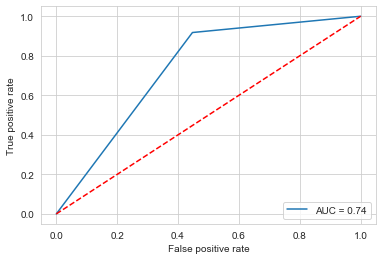

In [63]:
gb = GradientBoostingClassifier()
model_run(gb,x,y)

#### Obs: We pick the Logistic Regression as Most generalised model among all because the difference between Accuracy Score and cross validation score is miminum as compared to other models. 

# Hyper Parameter Tuning

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=76,test_size=.20,stratify=y)
lg=LogisticRegression()
param={'penalty':['l2','l1','elasticnet'],'C':[.001,.01,.1,1,10],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'max_iter':[50,100,200]}

grid=GridSearchCV(estimator=lg,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(x_train,y_train)

grid.best_params_

{'C': 0.001, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}

In [65]:
lg_final=LogisticRegression(C= 0.001,max_iter=50,penalty='l2',solver='liblinear')
lg_final.fit(x_train,y_train)
pred=lg_final.predict(x_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test)*100)
print('\n')
print('Final f_1 score :',f1_score(pred,y_test)*100)
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test)*100)
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 86.1788617886179


Final f_1 score : 90.9090909090909


Final roc_auc score : 91.66666666666667


Final classification Report :               precision    recall  f1-score   support

         0.0       0.55      1.00      0.71        21
         1.0       1.00      0.83      0.91       102

    accuracy                           0.86       123
   macro avg       0.78      0.92      0.81       123
weighted avg       0.92      0.86      0.88       123



Final confusion Matrix : [[21  0]
 [17 85]]


#### Obs: we can see that by hyperparameter tuning our F1 score and Roc_auc score has improved. Our Accuracy score remained same. Hence we will save this as our best model.

# Saving Model

In [66]:
import joblib
joblib.dump(lg_final,'Loan_status_lg.pkl')

['Loan_status_lg.pkl']

# Loading Model

In [67]:
loaded_model=joblib.load('Loan_status_lg.pkl')
prediction=loaded_model.predict(x_test)
prediction

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1.])